#### Analyze snapshots

Notebook for analysing snapshots of the Earth-Sun example.

In [1]:
# load libraries
import sys  # load sys; needed for exit codes
import numpy as np  # load numpy
import h5py  # load h5py; needed to read snapshots
import matplotlib
import matplotlib.pyplot as plt  ## needs to be active for plotting!
import csv
import os

#Import a couple of useful modules
#(These are written by BJK rather than being native to the gadget4 codebase)
sys.path.append("../../")
import units as u
import analysis

matplotlib.rc_file_defaults()
FloatType = np.float64

In [2]:
#Folder which contains the output snapshot files
fname_root = 'output'

Let's check that we can load a single snapshot:

In [3]:
filename = os.path.join(fname_root, 'snapshot_001.hdf5')

#This load_snapshot function should load the particle data from the snapshot
#with everything in cgs units
t, Pos, Vel, IDs = analysis.load_snapshot(filename, cgs_units=True)

print("Snapshot time [yr]:", t/u.yr)
print("Particle positions [au]:")
print(Pos/u.au)

Snapshot time [yr]: 0.0009717757945959779
Particle positions [au]:
[[0.         0.         0.        ]
 [0.99998137 0.0061066  0.        ]]


In [4]:
#List of snapshot indices
#(The snapshots are labelled 0, 1, 2, ..., 690)
snap_list = np.arange(691)

#This function loads a list of snapshots and gives the particle trajectories
#ts is the list of times of the snapshots 
#Pos_full are the particle positions, with dimensions (N_snapshots, N_particles, 3)
ts, Pos_full = analysis.load_all_snapshots(fname_root, snap_list, cgs_units=True)

Now let's plot the trajectories of the two particles (Sun and Earth)

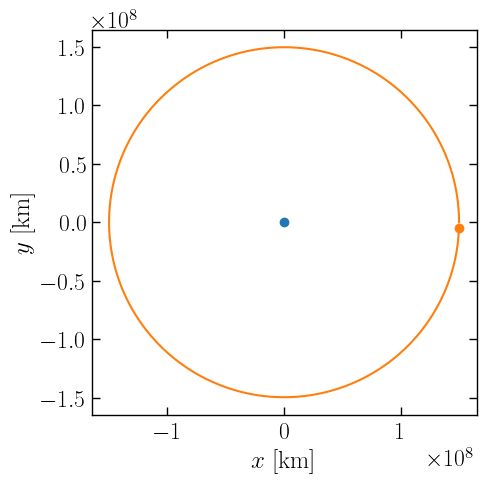

In [5]:
plt.figure(figsize=(5,5))

#Loop over the two particles and the plot the (x,y) trajectories
for i_part in range(2):
    plt.plot(Pos_full[:,i_part,0]/u.km, Pos_full[:,i_part,1]/u.km)
    plt.scatter(Pos_full[-1,i_part,0]/u.km, Pos_full[-1,i_part,1]/u.km)
    
plt.gca().set_aspect("equal")

plt.xlabel('$x$ [km]')
plt.ylabel('$y$ [km]')

plt.show()

Now let's check the stability of the orbit. We'll calculate the orbital radius and then plot it. We'll also check the $z$ separation of the binary - the binary is in the $(x, y)$ plane so the $z$ separation should be stable around zero.

In [6]:
x = Pos_full[:,0,0] - Pos_full[:,1,0]
y = Pos_full[:,0,1] - Pos_full[:,1,1]
z = Pos_full[:,0,2] - Pos_full[:,1,2]
r = np.sqrt(x**2 + y**2 + z**2)

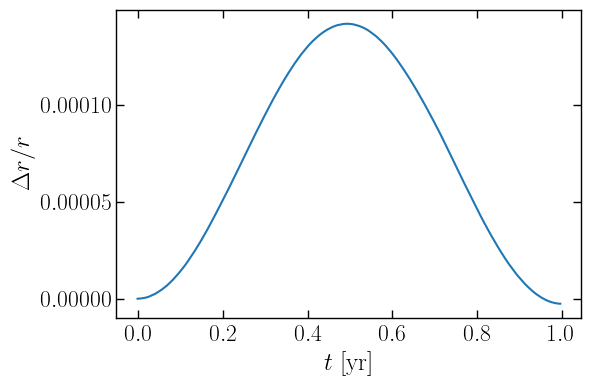

In [7]:
plt.figure(figsize=(6,4))

plt.plot(ts/u.yr, (r - r[0])/r[0])

plt.ylabel(r'$\Delta r/r$')
plt.xlabel(r'$t$ [yr]')

plt.show()

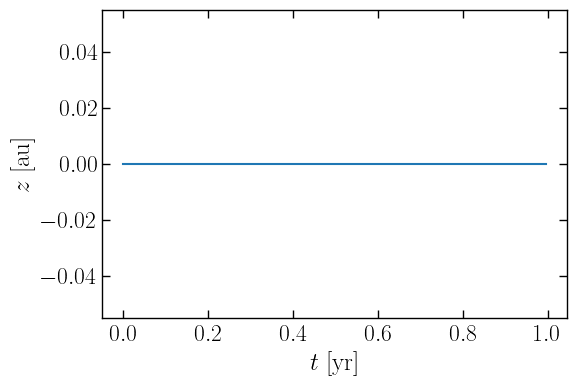

In [8]:
plt.figure(figsize=(6,4))

plt.plot(ts/u.yr, z/u.au)

plt.ylabel(r'$z$ [au]')
plt.xlabel(r'$t$ [yr]')

plt.show()

As you can see, everything looks good. The orbit is a circle, down to the level of 1 part in $10^4$. And the separation in the $z$ direction is stable around zero, as expected. 